In [35]:
%load_ext autoreload
%autoreload 2
from sample_models import *
from train_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


------------------------------------------------------------
pncc was loaded
------------------------------------------------------------
There are 2023 total training examples.


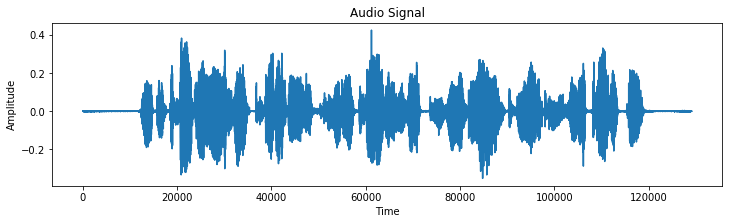

In [36]:
from IPython.display import Markdown, display
from data_generator import vis_train_features, plot_raw_audio
from IPython.display import Audio
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

# 1つのトレーニングデータからラベルと音声特徴量を抽出しています
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features()

# 生の音声データを確認する
plot_raw_audio(vis_raw_audio)
# play the audio file
Audio(vis_audio_path)

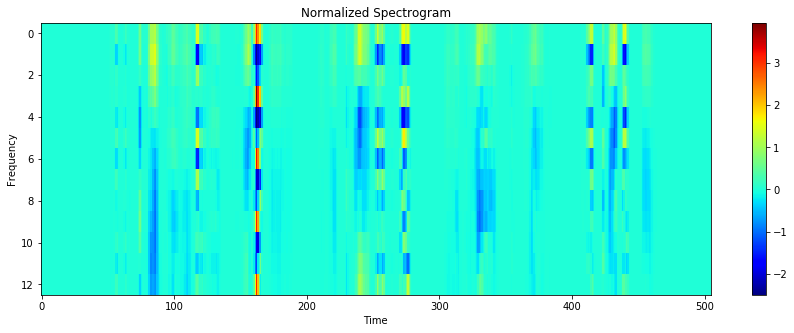

(13, 505)

In [43]:
from pncc import *
plot_spectrogram_feature(pncc(vis_raw_audio).T)
pncc(vis_raw_audio).T.shape

In [44]:
from data_generator import plot_spectrogram_feature

In [ ]:
model_0 = simple_rnn_model(input_dim=13) # 特徴としてMFCCを使うのならば、input_dim=13を指定
                                         # スプクトログラムを使うならば、input_dim=161を指定

train_model(input_to_softmax=model_0, 
            pickle_path='model_0.pickle', 
            save_model_path='model_0.h5',
            epochs=20,
            spectrogram=False) # 特徴としてMFCCを使うのならば、spectrogramはFalseを指定

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
rnn (GRU)                    (None, None, 29)          3741      
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total params: 3,741
Trainable params: 3,741
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
101/101 [==============================] - 2080s 21s/step - loss: 527.3007 - val_loss: 488.4730